In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

from pose_utils import draw_skeleton, annotate_keypoints, video_inference_squat

### Image

In [2]:
def inference(model, image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Perform inference
    results = model(image, verbose=False)

    # Extract keypoints (assuming single person detected)
    if results[0].keypoints is not None:
        keypoints = results[0].keypoints.xy.cpu().numpy()[0]  # (num_keypoints, 2)
        draw_skeleton(image, keypoints)
        annotate_keypoints(image, keypoints)
    else:
        print("No keypoints detected.")

    # Display the result
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [3]:
# model = YOLO("runs_nano/pose/train15/weights/best.pt")

In [5]:
# for i in range (15,20):
#     model = YOLO(f'runs_nano/pose/train{i}/weights/best.pt')
#     print(f'train{i}')
#     inference(model, './squat2.jpg')

Small model

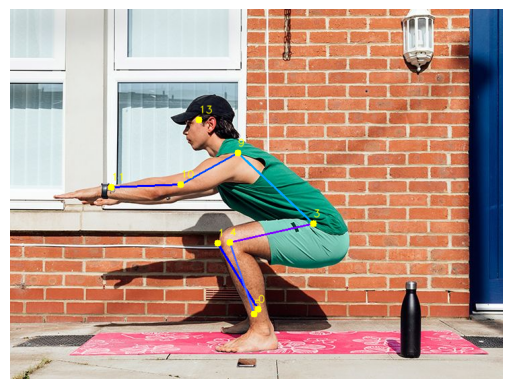

In [12]:
model = YOLO("runs/pose/train5/weights/best.pt")
inference(model, './squat1.jpg')

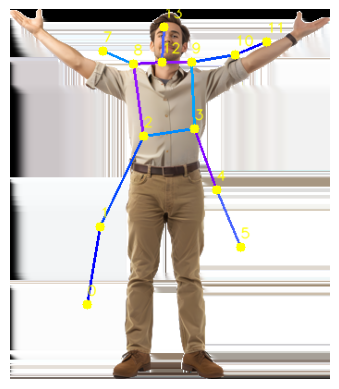

In [ ]:
model = YOLO("runs/pose/train5/weights/best.pt")
inference(model, './prova2.png')

Nano model

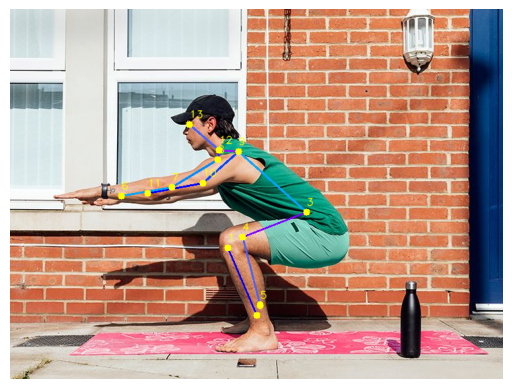

In [17]:
model = YOLO("runs_nano/pose/train15/weights/best.pt")
inference(model, './squat1.jpg')

c:\Users\Andrea\miniconda3\envs\torch\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


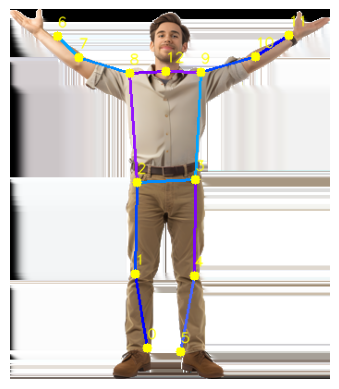

In [4]:
inference(model, './prova2.png')

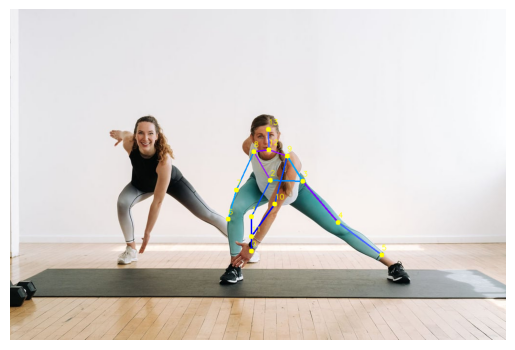

In [11]:
inference(model, './prova4.jpg')

### Video

In [ ]:
model = YOLO("runs_nano/pose/train15/weights/best.pt")
video_inference_squat(model, './test_video4.mp4')